# Call Dataloder for your task

In [10]:
'''
Filename: /home/maxtom/codespace/GPR_Competition/tests/test_cmu.py
Path: /home/maxtom/codespace/GPR_Competition/tests
Created Date: Friday, March 4th 2022, 5:08:28 pm
Author: maxtom

Copyright (c) 2022 Your Company
'''
import numpy as np
from tqdm import tqdm

from gpr.dataloader import LifeLoader
from gpr.evaluation import get_recall
from gpr.tools import HogFeature, to_image

from matplotlib import pyplot as plt
%matplotlib inline

loader = LifeLoader(
    '/home/maxtom/codespace/GPR_Competition/datasets/lifelong/day_back_1',
    image_size=[128, 128],
    top_size=[128,128],
    sph_size=[64,64],
    max_radius=30,
    fov_range=[-20,50]
)

## Visiualize raw images

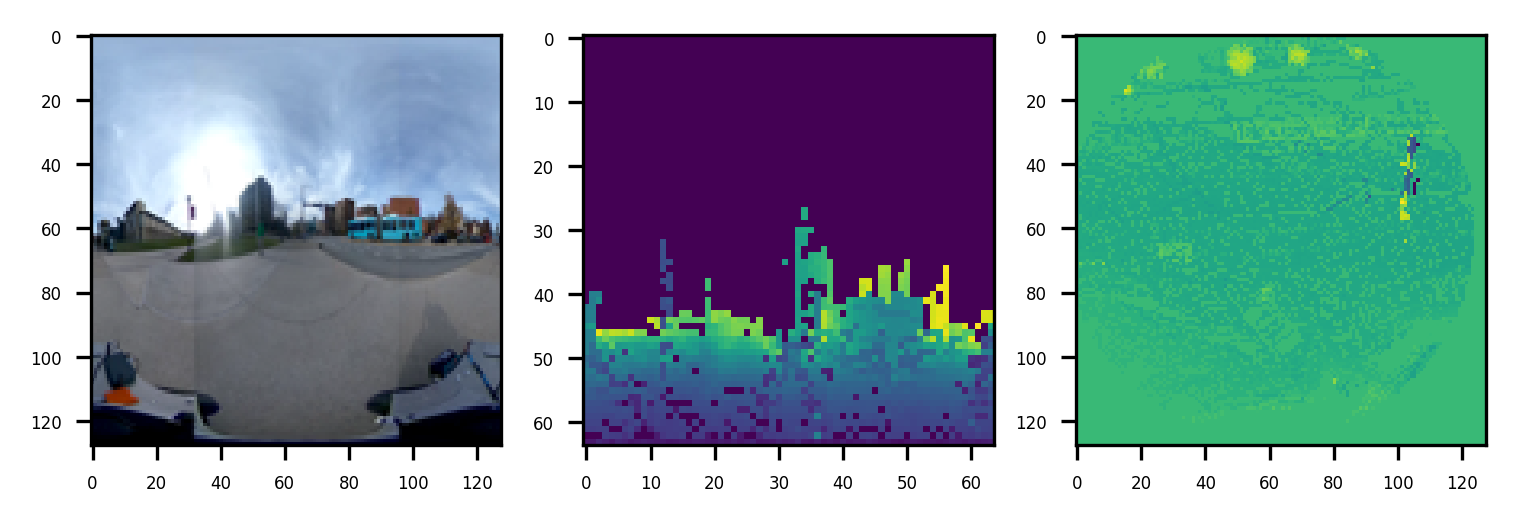

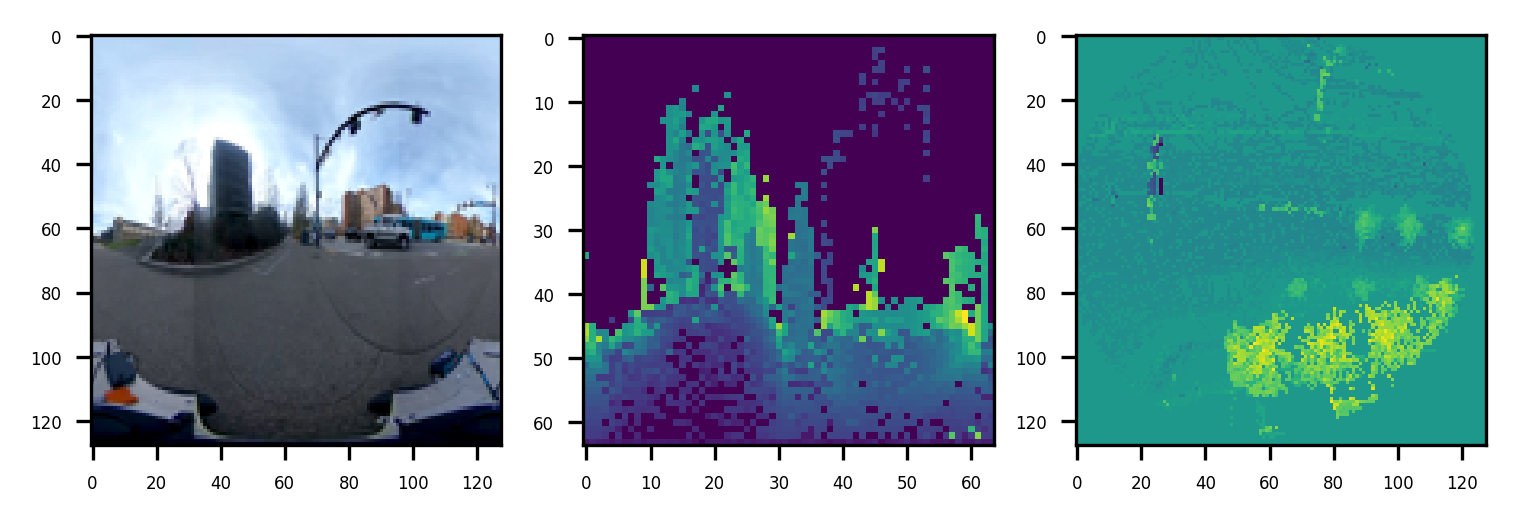

In [11]:
for index in range(1, 3):
    data = loader.__getitem__(index*250) #{'img': img, 'pcd': pcd, 'sph': sph, 'top': top}
    plt.rcParams['font.size'] = '4'
    f,ax = plt.subplots(1,3, dpi=300)
    for i, name in enumerate(['img', 'sph', 'top']):
        ax[i].imshow(to_image(data[name]))

## Evaluation Testing

Define your descriptor here


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


Top 1 recall 4.166666666666666
Top 5 recall 14.583333333333334


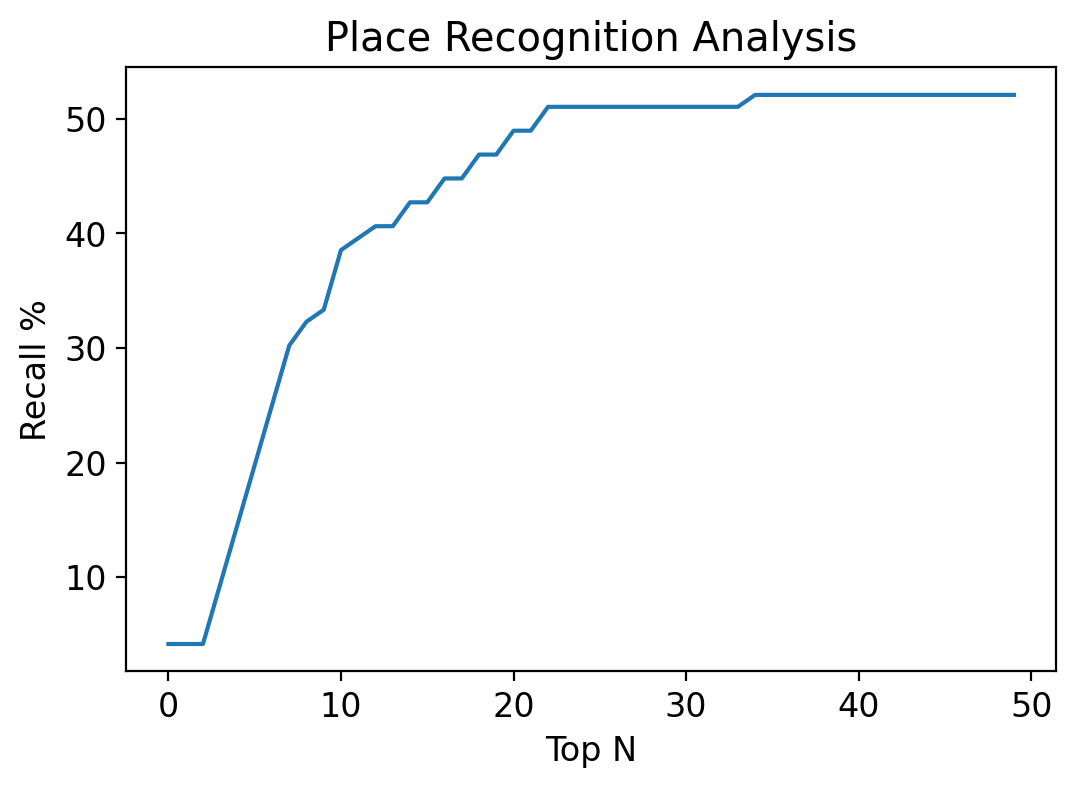

In [16]:
#* Test Data Loader
loader1 = LifeLoader('/home/maxtom/codespace/GPR_Competition/datasets/lifelong/day_forward_1')
loader2 = LifeLoader('/home/maxtom/codespace/GPR_Competition/datasets/lifelong/day_forward_2')
F = HogFeature()

feature_ref = []
feature_test = []
for idx in tqdm(range(100), total=100):
    data1 = loader1.__getitem__(10) #{'img': img, 'pcd': pcd, 'sph': sph, 'top': top}
    data2 = loader2.__getitem__(10) #{'img': img, 'pcd': pcd, 'sph': sph, 'top': top}

    #* Feature Extraction and Evaluation
    feature_ref.append(F.infer_data(to_image(data1['img'])))
    feature_test.append(F.infer_data(to_image(data2['img'])))

feature_ref = np.array(feature_ref)
feature_test = np.array(feature_test)

topN_recall, one_percent_recall = get_recall(feature_ref, feature_test)

f,ax = plt.subplots(1,1, dpi=200)
plt.rcParams['font.size'] = '12'
plt.plot(topN_recall)
plt.xlabel('Top N')
plt.ylabel('Recall %')
plt.title('Place Recognition Analysis')

print("Top 1 recall {}".format(topN_recall[0]))
print("Top 5 recall {}".format(topN_recall[4]))